In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(4)

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [5]:
df.shape

(1387, 806)

In [6]:
df.describe()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1387.000000
mean,694.000000,2017.132660,7.622927,6.109589,1.121125,7.775054,7.749099,11.423937,49.824802,11.335977,...,2.049180,14.344262,0.819672,1.639344,1.639344,2.049180,1.229508,5.327869,10.655738,1.669070
std,400.536723,0.787525,3.146701,2.071127,0.326390,23.024076,23.031140,29.936425,23.064600,29.967604,...,9.953489,63.140768,6.375335,8.940636,8.940636,9.953489,7.775557,37.376450,52.314019,0.470718
min,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,347.500000,2017.000000,6.000000,5.000000,1.000000,2.000000,2.000000,1.000000,34.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,694.000000,2017.000000,8.000000,7.000000,1.000000,2.000000,2.000000,1.000000,46.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1040.500000,2018.000000,10.000000,7.000000,1.000000,2.000000,2.000000,2.000000,59.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1387.000000,2019.000000,12.000000,8.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,50.000000,400.000000,50.000000,50.000000,50.000000,50.000000,50.000000,400.000000,400.000000,2.000000


## Preprocessing

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop("ID",axis=1)

In [9]:
df.replace(["99",99],np.nan,inplace=True)

In [10]:
df.head(4)

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,Income,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,2018,11,7,1,2.0,2.0,2.0,53.0,1.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2018,1,7,1,2.0,2.0,1.0,17.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2018,5,7,1,2.0,2.0,1.0,47.0,1.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2018,1,7,1,2.0,2.0,1.0,21.0,1.0,30000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


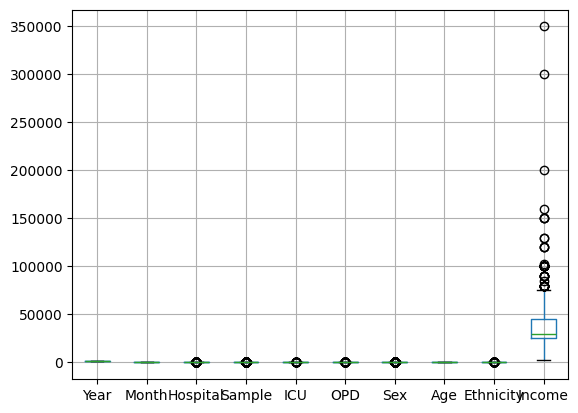

In [11]:
df.iloc[:,:10].boxplot()
plt.show()

In [12]:
df.isna().sum()

Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
ICU                                              83
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 805, dtype: int64

In [13]:
df.isna().mean()*100

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.984138
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 805, dtype: float64

In [14]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
df.rename(columns = col_names, inplace=True)

In [15]:
# combine some symtoms binary columns as counts

col_names1 = ['Headache', 'Fever', 'Chills', 'Rigors', 'Musclepain', 'Mustender', 'Nausea', 'Vomiting', 
              'Consuf', 'Skinrash', 'Mucorash', 'Prostration', 'diarrhea', 'Oliguria', 'Anuria', 'Jaundice',
              'Photophobia', 'Confusion', 'Cough', 'Haemoptysis', 'SOB', 'Chestpain', 'Bleeding']

for col in col_names1:
    symptom_columns = [f'{col}{i}' for i in ['onset', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'ad']]
    df1 = df[symptom_columns].replace(99, np.nan)
    
    df[col + 'Days'] = df1.apply(lambda row: row.eq(1).sum() if row.notna().any() else np.nan, axis=1)
    df.drop(symptom_columns, axis=1, inplace=True)

In [16]:
df.shape

(1387, 575)

In [17]:
# Calculate the percentage of missing values for each column
missing_per = df.isna().mean() * 100

# Determine columns to drop based on the threshold (more than 70% missing values)
columns_to_drop = missing_per[missing_per > 70].index

# Drop columns with more than 70% missing values
df.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
df.shape

(1387, 125)

In [19]:
columns_with_99_value=df.columns[df.eq('99').any()]
columns_with_99_value

Index([], dtype='object')

In [20]:
#Calculate the percentage of '99' values in each column
percent_99 = (df == 99).mean()

#Find columns with more than 50% '99' values
columns_with_over_50_percent_99 = percent_99[percent_99 > 0.5].index.tolist()
columns_with_over_50_percent_99

[]

In [21]:
missing_percentage = (df == 99).mean()* 100

# Determine columns to drop based on the threshold
columns_to_drop_2 = missing_percentage[missing_percentage > 50].index

# Drop columns with more than 50% missing values
df = df.drop(columns_to_drop_2, axis=1)

In [22]:
df.shape

(1387, 125)

In [23]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 125 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    Year                         int64  
 1    Month                        int64  
 2    Hospital                     int64  
 3    Sample                       int64  
 4    ICU                          float64
 5    OPD                          float64
 6    Sex                          float64
 7    Age                          float64
 8    Ethnicity                    float64
 9    Income                       float64
 10   Education                    float64
 11   TertiaryEducation            float64
 12   Prophylactics                float64
 13   Pasttreatments               float64
 14   Pastantibiotics              float64
 15   Chronicillness               float64
 16   Possibleexposure             float64
 17   Usualdrinkingwatersource     float64
 18   Usualbathingwatersource   

In [24]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

df[cat_columns_to_convert] = df[cat_columns_to_convert].astype('category')


In [25]:
df.describe()

,Age,Income,Usualdrinkingwatersource,Usualbathingwatersource,Sourceofwaterforhousehold,Garbagedisposalprocedure,Accumilationofrefusal,Marshlandexposure,Wetsoilexposure,Floodexposure,...,OliguriaDays,AnuriaDays,JaundiceDays,PhotophobiaDays,ConfusionDays,CoughDays,HaemoptysisDays,SOBDays,ChestpainDays,BleedingDays
count,1217.000000,851.000000,421.000000,423.000000,421.000000,420.000000,421.000000,437.000000,433.000000,448.000000,...,1077.000000,1075.000000,1076.000000,1076.000000,1076.000000,1076.000000,1077.000000,1076.000000,1076.000000,1069.000000
mean,42.955629,38142.184489,4.349169,3.612293,2.945368,2.497619,1.843230,1.894737,1.773672,1.957589,...,0.644383,0.177674,1.415428,0.930297,0.271375,1.919145,0.074280,0.968401,1.047398,0.584659
std,14.867828,25581.767906,2.642002,1.975211,1.541292,1.466408,0.364016,0.307244,0.418938,0.201750,...,1.894229,0.949892,2.933258,2.531251,1.293547,3.342463,0.695216,2.542463,2.559539,1.848572
min,2.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,25000.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,30000.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,45000.000000,8.000000,5.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,350000.000000,8.000000,8.000000,8.000000,7.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


## Impute missing values

In [26]:
df.isna().sum()

Year                 0
Month                0
Hospital             0
Sample               0
ICU                 83
                  ... 
CoughDays          311
HaemoptysisDays    310
SOBDays            311
ChestpainDays      311
BleedingDays       318
Length: 125, dtype: int64

In [27]:
col_missing_values=df.columns[df.isna().any()]
col_missing_values

Index(['ICU', 'OPD', 'Sex', 'Age', 'Ethnicity', 'Income', 'Education',
       'TertiaryEducation', 'Prophylactics', 'Pasttreatments',
       ...
       'OliguriaDays', 'AnuriaDays', 'JaundiceDays', 'PhotophobiaDays',
       'ConfusionDays', 'CoughDays', 'HaemoptysisDays', 'SOBDays',
       'ChestpainDays', 'BleedingDays'],
      dtype='object', length=119)

In [28]:
impute_train=df.copy()

In [29]:
impute_train=impute_train.fillna(impute_train.mode().iloc[0])

In [30]:
col_missing_values=impute_train.columns[impute_train.isna().any()]
col_missing_values

Index([], dtype='object')

In [31]:
impute_train.isna().sum()

Year               0
Month              0
Hospital           0
Sample             0
ICU                0
                  ..
CoughDays          0
HaemoptysisDays    0
SOBDays            0
ChestpainDays      0
BleedingDays       0
Length: 125, dtype: int64

In [32]:
impute_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 125 columns):
 #    Column                       Dtype   
---   ------                       -----   
 0    Year                         category
 1    Month                        category
 2    Hospital                     category
 3    Sample                       category
 4    ICU                          category
 5    OPD                          category
 6    Sex                          category
 7    Age                          float64 
 8    Ethnicity                    category
 9    Income                       float64 
 10   Education                    category
 11   TertiaryEducation            category
 12   Prophylactics                category
 13   Pasttreatments               category
 14   Pastantibiotics              category
 15   Chronicillness               category
 16   Possibleexposure             category
 17   Usualdrinkingwatersource     float64 
 18   Usualb

### Impute Outliers

In [33]:
numerical_columns = impute_train.select_dtypes(include=['int64','float64']).columns
numerical_columns

data = impute_train[numerical_columns]

# Define a function to identify and handle outliers using IQR method
def handle_outliers(data,threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    
    lower = Q1 - threshold*IQR
    upper = Q3 + threshold*IQR
    
    # Replace outliers with the median value
    data = np.where((data<lower)|(data>upper),data.median(),data)
    return data

# Handle outliers in the dataset
outlier_handled_data = data.apply(handle_outliers)

impute_train[numerical_columns] = outlier_handled_data[numerical_columns]
print(impute_train)

      Year Month Hospital Sample  ICU  OPD  Sex   Age Ethnicity   Income  ...  \
0     2018    11        7      1  2.0  2.0  2.0  53.0       1.0  35000.0  ...   
1     2018     1        7      1  2.0  2.0  1.0  17.0       1.0  30000.0  ...   
2     2018     5        7      1  2.0  2.0  1.0  47.0       1.0  40000.0  ...   
3     2018     1        7      1  2.0  2.0  1.0  21.0       1.0  30000.0  ...   
4     2016     8        7      1  2.0  1.0  1.0  40.0       1.0  30000.0  ...   
...    ...   ...      ...    ...  ...  ...  ...   ...       ...      ...  ...   
1382  2019     8        4      2  2.0  2.0  1.0  62.0       1.0  30000.0  ...   
1383  2018    11        7      1  2.0  2.0  2.0  59.0       2.0  30000.0  ...   
1384  2017     9        5      1  2.0  1.0  1.0  56.0       1.0  30000.0  ...   
1385  2019     4        4      2  2.0  2.0  1.0  61.0       1.0  30000.0  ...   
1386  2017     8        8      1  2.0  2.0  1.0  36.0       1.0  30000.0  ...   

     OliguriaDays AnuriaDay

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X = impute_train.drop('Final', axis = 1)
y = impute_train['Final']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [35]:
x_train.shape

(1109, 124)

## Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score



categorical_cols = X.select_dtypes(include='category').columns.tolist()
numeric_cols = X.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_encoded = label_encoder.fit_transform(y)

## Logistic Regression model

In [37]:
# Logistic regression model
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logistic_model.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = logistic_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.8674481514878268


In [38]:
y_preds = logistic_model.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Test Accuracy: 0.8597122302158273


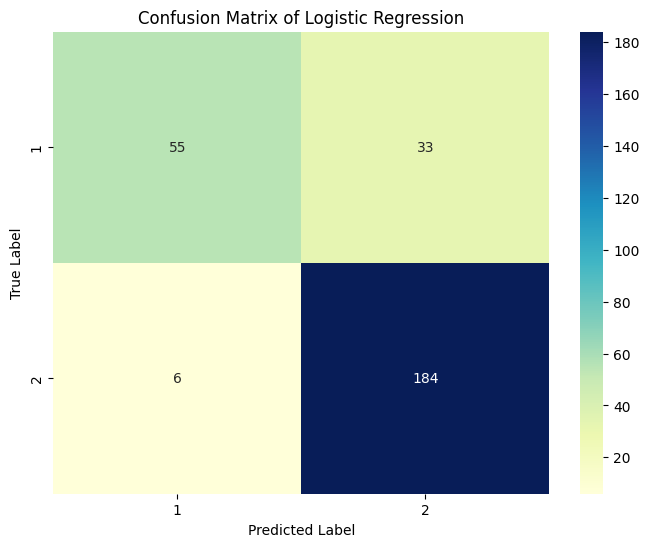

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the customer category labels
category_labels = ['1', '2']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

params = {
   'classifier__C': [-0.5, 1, .5],
   'classifier__tol': [1e-3, 1e-4], 
   'classifier__penalty': ['l1', 'l2'],
   'classifier__solver': ['lbfgs', 'liblinear'], 
   'classifier__fit_intercept': [True, False],
   'classifier__max_iter': [100, 150],
  }

hp_tuning = GridSearchCV(logistic_model, params, scoring='accuracy')

hp_tuning.fit(x_train,y_train_encoded)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Year',
                                                                          'Month',
                                                                          'Hospital',
                                                                          'Sample',
                                                                          'ICU',
                                                                          'OPD',
                                                                          'Sex',
                                                                          'Ethnicity',
                                                                          'Education',
                                                                          'TertiaryEducation',
                                                                          'Prophylactics',
                                                                          'Pasttreatments',
                                                                          'Pastantibiotics',
                                                                          'Chronicillness',
                                                                          'Possibleexposure',
                                                                          'Psychoticsymptomsonset',
                                                                          'Psycho...
                                                                          'Hepatictendernessad',
                                                                          'Hepatomegalyad',
                                                                          'Spleenimegalyad', ...])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [-0.5, 1, 0.5],
                         'classifier__fit_intercept': [True, False],
                         'classifier__max_iter': [100, 150],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear'],
                         'classifier__tol': [0.001, 0.0001]},
             scoring='accuracy')

In [41]:
hp_tuning.best_params_

{'classifier__C': 0.5,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear',
 'classifier__tol': 0.001}

In [42]:
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100,
                                      C = 0.5,
                                      fit_intercept = True,
                                      penalty = 'l1',
                                      solver = 'liblinear',
                                      tol = 0.001
                                      ))
])

logistic_model.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = logistic_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.8638412984670875


In [43]:
y_preds = logistic_model.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Test Accuracy: 0.8561151079136691


### XGBoost

In [44]:
import xgboost as xgb

xgboost = xgb.XGBClassifier()

xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost)
])

xgboost_model.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = xgboost_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.981965734896303


In [45]:
y_preds = xgboost_model.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Test Accuracy: 0.8273381294964028


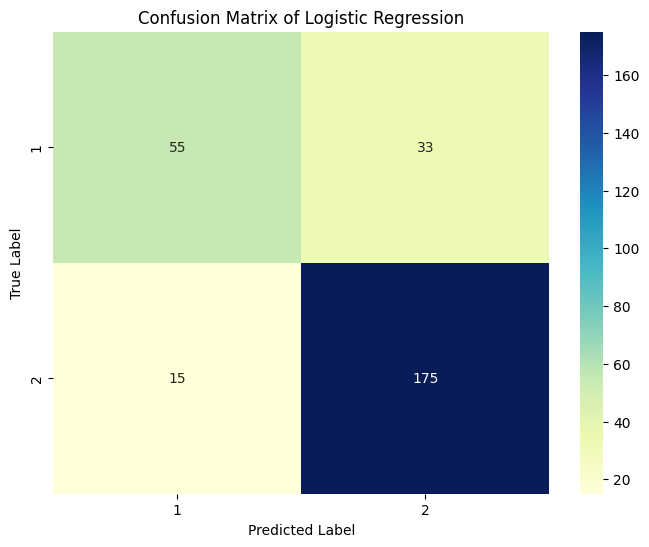

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the customer category labels
category_labels = ['1', '2']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

## Ada Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()

adaboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', adaboost)
])

adaboost_model.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = adaboost_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.8836789900811542


In [48]:
y_preds = adaboost_model.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Test Accuracy: 0.8489208633093526


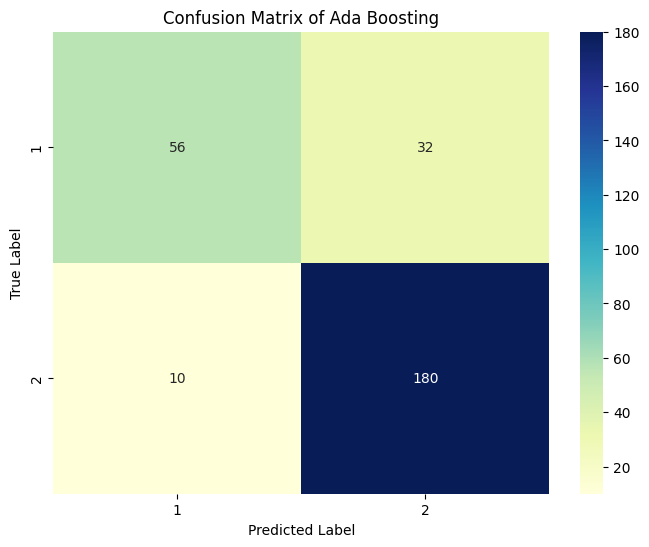

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the customer category labels
category_labels = ['1', '2']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Ada Boosting')
plt.show()

### Random Forrest

In [50]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

rf_model.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = rf_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9828674481514879


In [51]:
y_preds = rf_model.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Test Accuracy: 0.8525179856115108


In [52]:
n_estimators = [100, 200, 300, 400, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100, 200, 300]
min_samples_leaf = [25, 50, 100, 200, 300]
max_terminal_nodes = [0, 25, 50, 75, 100,125, 150, 175]
max_samples = [0,2, 0.4, 0.6, 0.8]

hyperF = dict(classifier__n_estimators = n_estimators, 
              classifier__max_depth = max_depth,  
              classifier__min_samples_split = min_samples_split, 
              classifier__min_samples_leaf = min_samples_leaf,
              classifier__max_samples = max_samples
              )

gridF = GridSearchCV(rf_model, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(x_train, y_train_encoded)

Fitting 3 folds for each of 4375 candidates, totalling 13125 fits


In [53]:
bestF.best_params_

{'classifier__max_depth': 8,
 'classifier__max_samples': 0.8,
 'classifier__min_samples_leaf': 25,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 100}

In [54]:
classifier = RandomForestClassifier(max_depth=30,max_samples=0.8,min_samples_leaf=25,min_samples_split=2,n_estimators=100)

rf_model_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

rf_model_best.fit(x_train, y_train_encoded)

# Evaluate the model
accuracy = rf_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

y_preds = rf_model_best.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Accuracy: 0.9828674481514879
Test Accuracy: 0.8561151079136691


In [57]:
classifier = RandomForestClassifier(max_depth=30,max_samples=0.8,min_samples_leaf=25,min_samples_split=2,n_estimators=100)

rf_model_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

rf_model_best.fit(X, y_encoded)

# Evaluate the model
accuracy = rf_model.score(x_train, y_train_encoded)
print("Accuracy:", accuracy)

y_preds = rf_model_best.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_pred=y_preds,y_true=y_test_encoded)}")

Accuracy: 0.9828674481514879
Test Accuracy: 0.8561151079136691


# Processing and predicting the  test data

In [58]:
test_df = pd.read_csv("test.csv",encoding='latin-1')

In [59]:
test_df.head()

,ï..Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc
0,1280,2017,6,1,1,2,2,1,49,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1281,2017,6,1,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283,2017,6,1,1,2,2,1,51,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1287,2017,6,1,1,2,2,2,37,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1297,2017,6,1,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test=test_df.copy()

In [61]:
test.shape

(347, 805)

In [62]:
test=test.drop("ï..Serial",axis=1)

In [63]:
test.replace(["99",99],np.nan,inplace=True)

In [64]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
test.rename(columns = col_names, inplace=True)

In [65]:
# combine some symtoms binary columns as counts

col_names1 = ['Headache', 'Fever', 'Chills', 'Rigors', 'Musclepain', 'Mustender', 'Nausea', 'Vomiting', 
              'Consuf', 'Skinrash', 'Mucorash', 'Prostration', 'diarrhea', 'Oliguria', 'Anuria', 'Jaundice',
              'Photophobia', 'Confusion', 'Cough', 'Haemoptysis', 'SOB', 'Chestpain', 'Bleeding']

for col in col_names1:
    symptom_columns = [f'{col}{i}' for i in ['onset', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'ad']]
    df1 = test[symptom_columns].replace(99, np.nan)
    
    test[col + 'Days'] = df1.apply(lambda row: row.eq(1).sum() if row.notna().any() else np.nan, axis=1)
    test.drop(symptom_columns, axis=1, inplace=True)

In [66]:
test.shape

(347, 574)

In [67]:
# Drop columns with more than 70% missing values
test.drop(columns_to_drop, axis=1, inplace=True)

In [68]:
# Drop columns with more than 50% missing values (99)
test.drop(columns_to_drop_2, axis=1,inplace=True)

In [69]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1']

test[cat_columns_to_convert] = test[cat_columns_to_convert].astype('category')

In [70]:
test.isna().sum()

Year                0
Month               0
Hospital            0
Sample              0
ICU                19
                   ..
CoughDays          75
HaemoptysisDays    76
SOBDays            76
ChestpainDays      76
BleedingDays       78
Length: 124, dtype: int64

In [71]:
test.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 124 columns):
 #    Column                       Dtype   
---   ------                       -----   
 0    Year                         category
 1    Month                        category
 2    Hospital                     category
 3    Sample                       category
 4    ICU                          category
 5    OPD                          category
 6    Sex                          category
 7    Age                          float64 
 8    Ethnicity                    category
 9    Income                       float64 
 10   Education                    category
 11   TertiaryEducation            category
 12   Prophylactics                category
 13   Pasttreatments               category
 14   Pastantibiotics              category
 15   Chronicillness               category
 16   Possibleexposure             category
 17   Usualdrinkingwatersource     float64 
 18   Usualbat

In [72]:
impute_test= test.copy()

impute_test= impute_test.fillna(impute_test.mode().iloc[0])

In [73]:
columns_missing_values = impute_test.columns[impute_test.isna().any()]
columns_missing_values

Index([], dtype='object')

In [74]:
impute_test.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 124 columns):
 #    Column                       Dtype   
---   ------                       -----   
 0    Year                         category
 1    Month                        category
 2    Hospital                     category
 3    Sample                       category
 4    ICU                          category
 5    OPD                          category
 6    Sex                          category
 7    Age                          float64 
 8    Ethnicity                    category
 9    Income                       float64 
 10   Education                    category
 11   TertiaryEducation            category
 12   Prophylactics                category
 13   Pasttreatments               category
 14   Pastantibiotics              category
 15   Chronicillness               category
 16   Possibleexposure             category
 17   Usualdrinkingwatersource     float64 
 18   Usualbat

## Prediction

In [75]:
rf_model_best.fit(X, y_encoded)
test_pred = rf_model_best.predict(impute_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [76]:
test_pred = test_pred+1
test_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [77]:
ids = range(1,len(test_df)+1)

In [78]:
predictions_df=pd.DataFrame({
    'ID': ids,
    'Final':test_pred
})

In [79]:
predictions_df.to_csv('sub5.csv', index=False)